[internships.datalabs.info](https://internships.datalabs.info)

---

## Internship on "Full Stack Data Science" at InfraBIM Techno Solutions
### DS-09: Project - Diabetes Prediction

---

Internship Reg. No.:1096
Name:S.TRIVENI REDDY
Date:13/01/2023

Other Team Members: (Reg.No. - Name)<br>
1.2031-K.KARNIKA
2.2032-O.AKANKSHA
3.2033-T.ANUSHA

Problem Statement:TO PREDICT WHETHER THE PERSON HAS DIABETES OR NOT.

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
d= pd.read_csv("https://internships-data.s3.ap-south-1.amazonaws.com/Projects/Data/diabetes_predict_dataset.csv")
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
d.shape

(768, 9)

In [6]:
#checking for missing values
d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
d.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#stastistical measures of the data
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#checking the distribution of target variable
d['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

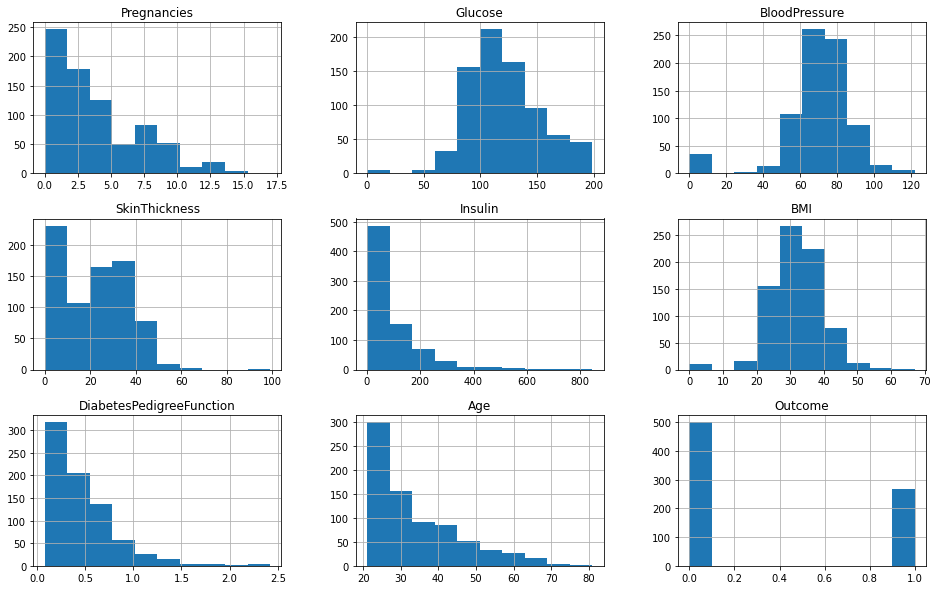

In [12]:
# Generate Histogram - It is a graphical representation of a grouped frequency distribution with continuous classes
d.hist(figsize=(16,10),bins=10)

In [13]:
corr = d.corr(method='pearson',min_periods=1).round(2)
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130000,0.140000,-0.080000,-0.070000,0.020000,-0.030000,0.540000,0.220000
Glucose,0.130000,1.000000,0.150000,0.060000,0.330000,0.220000,0.140000,0.260000,0.470000
BloodPressure,0.140000,0.150000,1.000000,0.210000,0.090000,0.280000,0.040000,0.240000,0.070000
SkinThickness,-0.080000,0.060000,0.210000,1.000000,0.440000,0.390000,0.180000,-0.110000,0.070000
Insulin,-0.070000,0.330000,0.090000,0.440000,1.000000,0.200000,0.190000,-0.040000,0.130000
BMI,0.020000,0.220000,0.280000,0.390000,0.200000,1.000000,0.140000,0.040000,0.290000
DiabetesPedigreeFunction,-0.030000,0.140000,0.040000,0.180000,0.190000,0.140000,1.000000,0.030000,0.170000
Age,0.540000,0.260000,0.240000,-0.110000,-0.040000,0.040000,0.030000,1.000000,0.240000
Outcome,0.220000,0.470000,0.070000,0.070000,0.130000,0.290000,0.170000,0.240000,1.000000


In [14]:
# print the concise summary of the dataset
d.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
X = d.drop(['Outcome'], axis=1)
Y = d['Outcome']

In [17]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
# Splitting the dataset into 80% training data and 20% testing data.
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20)

In [20]:
#understanding of Machine learning models from sklearn module.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 
               'KNeighborsClassifier',  'RandomForestClassifier', 
               'LinearDiscriminantAnalysis',  'GaussianNB', 'SVC']

#Model Preparation
num_trees = 200
max_features = 3
models = []
models.append(('LR',LogisticRegression(multi_class='ovr')))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=10)))
models.append(('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(probability=True)))

# print (models)

In [21]:
Score = pd.DataFrame({"Classifier":classifiers})

#Fit model
from sklearn.model_selection import KFold
results = []
names = []
scoring = 'accuracy'
model_score = []

for name,model in models:
    kfold = KFold(n_splits=5,shuffle=False)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_score.append(cv_results.mean()*100)
    
Score["Accuracy"] = model_score
Score.sort_values(by="Accuracy", ascending=False, inplace = True) 
Score

,Classifier,Accuracy
4,LinearDiscriminantAnalysis,74.903372
0,LogisticRegression,74.412902
5,GaussianNB,74.102359
3,RandomForestClassifier,73.930428
2,KNeighborsClassifier,72.632280
6,SVC,72.630948
1,DecisionTreeClassifier,67.907504


In [22]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(y_pred)

[0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 0 1]


In [23]:
result = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,y_pred)
print("Accuracy:",result2*100)

Confusion Matrix:
[[94 14]
 [11 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       108
           1       0.71      0.76      0.74        46

    accuracy                           0.84       154
   macro avg       0.80      0.82      0.81       154
weighted avg       0.84      0.84      0.84       154

Accuracy: 83.76623376623377


In [25]:
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
prediction = model.predict([[6,148,72,35,0,33.6,0.627,50]])
print(prediction)

[1]


In [27]:
model.predict([[1,85,66,29,0,26.6,0.351,31]])

array([0], dtype=int64)

In [28]:
import pickle
pickle.dump(model,open("1096.pkl","wb"))

In [29]:
model=pickle.load(open("1096.pkl","rb"))
model

LogisticRegression(multi_class='ovr')

In [30]:
model.predict([[1,93,70,31,0,30.4,0.315,23]])

array([0], dtype=int64)